<a href="https://colab.research.google.com/github/AlexandreLarget/advanced_computer_vision/blob/main/02_ACV_feedforward_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN for image classification

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2955 - accuracy: 0.9151 - val_loss: 0.1400 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1457 - accuracy: 0.9563 - val_loss: 0.1014 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.0889 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.0825 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9756 - val_loss: 0.0787 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9800 - val_loss: 0.0803 - val_accuracy:

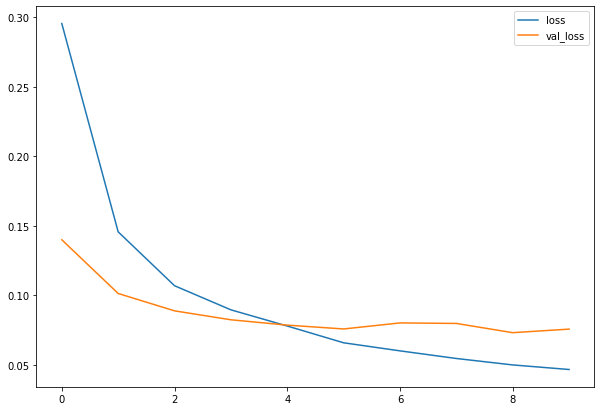

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

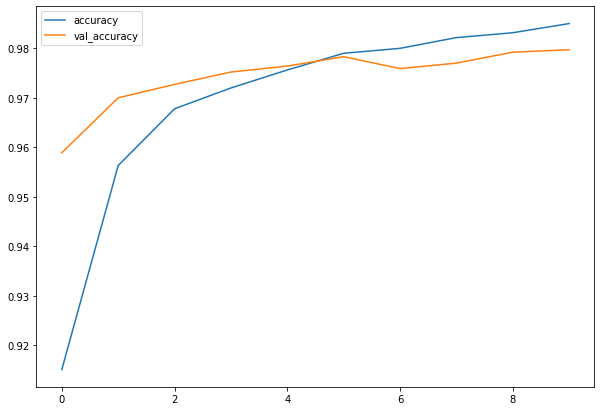

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9797


[0.07579401880502701, 0.9797000288963318]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix non normalized")
  plt.figure(figsize=(7,7))
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  ticks_marks = np.arange(len(classes))
  plt.xticks(ticks_marks, classes, rotation=45)
  plt.yticks(ticks_marks, classes)

  fmt = "0.2f" if normalize else "d"
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

313/313 [==============================] - 1s 2ms/step
Confusion matrix non normalized


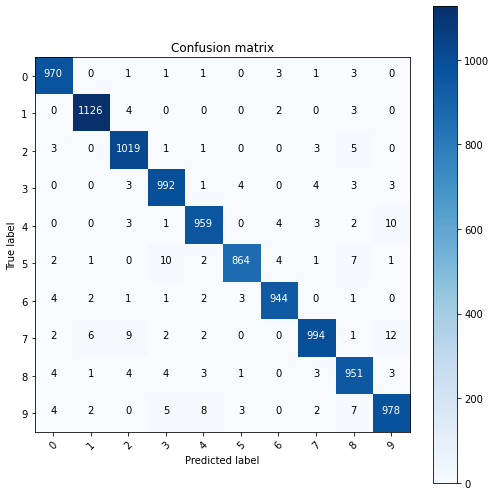

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

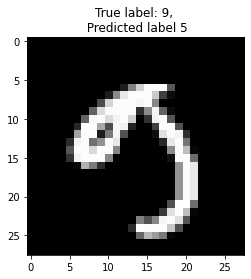

In [ ]:
misclassed_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassed_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]}, \n Predicted label {p_test[i]}");

# ANN for regression

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

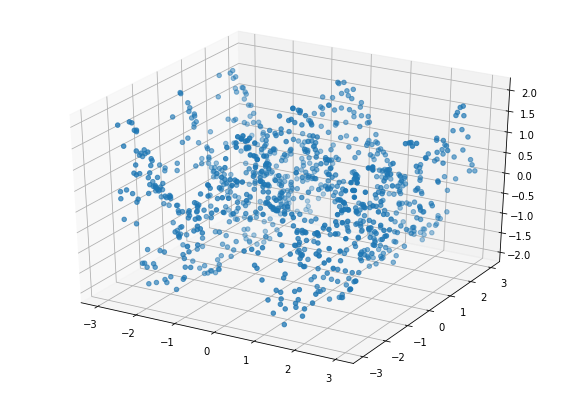

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y);

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9856
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9588
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9328
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9132
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9059
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8277
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7689
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6345
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6187
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6072
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6179
Epoch 13/100
32/32 [=================

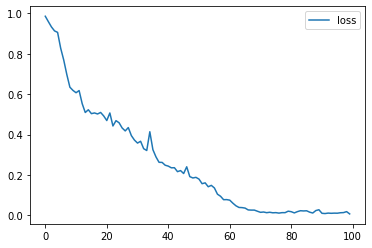

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.legend();

79/79 [==============================] - 0s 1ms/step


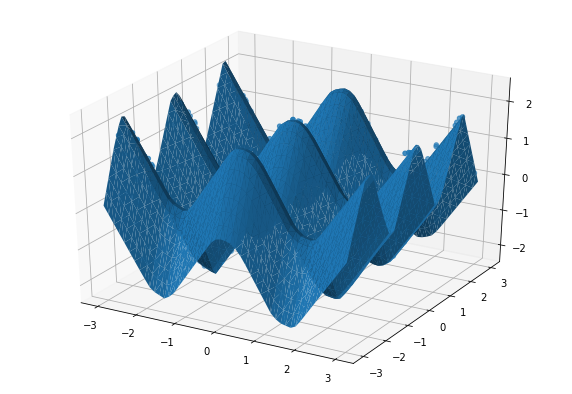

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


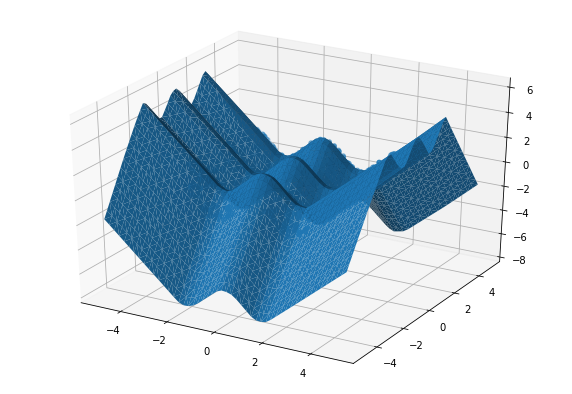

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

# Exercise

In [ ]:
!wget https://lazyprogrammer.me/course_files/exercises/ecoli.csv

--2022-12-07 02:39:16--  https://lazyprogrammer.me/course_files/exercises/ecoli.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19487 (19K) [text/csv]
Saving to: ‘ecoli.csv’

ecoli.csv           100%[===================>]  19.03K  --.-KB/s    in 0s      

2022-12-07 02:39:17 (89.1 MB/s) - ‘ecoli.csv’ saved [19487/19487]



In [ ]:
import pandas as pd
data = pd.read_csv("ecoli.csv", delim_whitespace=True, header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [ ]:
data[8].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: 8, dtype: int64

In [ ]:
for i in data.columns:
  print(i, data[i].min(), data[i].max())

0 AAS_ECOLI YTFQ_ECOLI
1 0.0 0.89
2 0.16 1.0
3 0.48 1.0
4 0.5 1.0
5 0.0 0.88
6 0.03 1.0
7 0.0 0.99
8 cp pp


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[8] = le.fit_transform(data[8])

In [ ]:
X = data.iloc[:,1:-1].values
y = data[8]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((268, 7), (268,), (68, 7), (68,))

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(7, ), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=100,
              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=10)])

Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 1.9853 - accuracy: 0.2276 - val_loss: 1.8890 - val_accuracy: 0.2059 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.8410 - accuracy: 0.2985 - val_loss: 1.7644 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 1.7272 - accuracy: 0.4216 - val_loss: 1.6707 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.6507 - accuracy: 0.5037 - val_loss: 1.5988 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 1.5918 - accuracy: 0.4701 - val_loss: 1.5457 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 1.5617 - accuracy: 0.4925 - val_loss: 1.5071 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.5175 - accurac

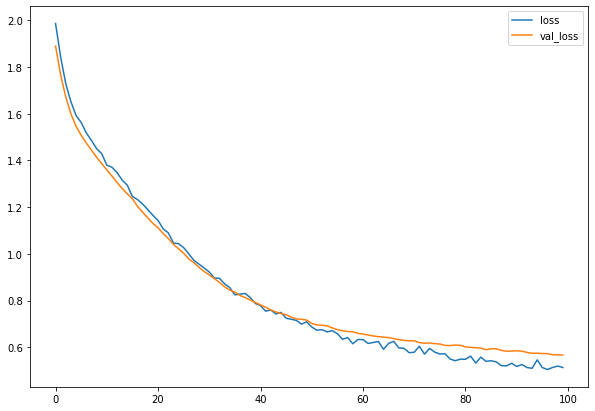

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

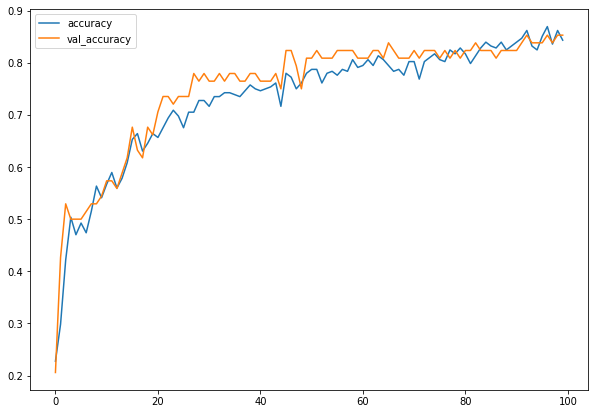

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.8529


[0.5666568875312805, 0.8529411554336548]

3/3 [==============================] - 0s 4ms/step
Confusion matrix non normalized


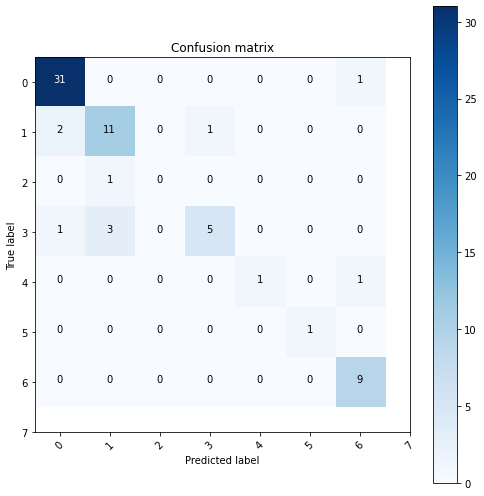

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(8)))